In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_json("ayurwiz_users.json")
df.head()

,Education,Sex,Career Fields,Relationship Status,Hobbies,Age
0,Primary education,Female,arts,IN AN OPEN RELATIONSHIP,Woodworking,24
1,Secondary education or high school,Other,culture and entertainment,THE BACKUP,Woodworking,33
2,No formal education,Female,science and technology,THE SIDE PIECE,Genealogy,45
3,Bachelor's degree,Other,farming,PROUD SINGLE,Woodworking,38
4,Primary education,Male,culture and entertainment,THE BOOTY CALL,"Video Games, Team Sports",36


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2607 entries, 0 to 2606
Data columns (total 6 columns):
Education              2607 non-null object
Sex                    2607 non-null object
Career Fields          2607 non-null object
Relationship Status    2607 non-null object
Hobbies                2607 non-null object
Age                    2607 non-null int64
dtypes: int64(1), object(5)
memory usage: 122.3+ KB


In [82]:
df.describe()

,Age
count,2607.000000
mean,31.454929
std,8.071544
min,18.000000
25%,24.000000
50%,32.000000
75%,38.000000
max,45.000000


## Now, we are converting the textual categorical data into the numeric.

### Label encoding the education data since there's the relation in order. 

However, GED and Highschool education might be the same thing and we will assume that vocational qualification and highschool diploma are equivalent in our case. 

In [83]:
df['Education'] = df['Education'].replace(['GED', 'Vocational qualification'], 'Secondary education or high school')
df.head(20)

,Education,Sex,Career Fields,Relationship Status,Hobbies,Age
0,Primary education,Female,arts,IN AN OPEN RELATIONSHIP,Woodworking,24
1,Secondary education or high school,Other,culture and entertainment,THE BACKUP,Woodworking,33
2,No formal education,Female,science and technology,THE SIDE PIECE,Genealogy,45
3,Bachelor's degree,Other,farming,PROUD SINGLE,Woodworking,38
4,Primary education,Male,culture and entertainment,THE BOOTY CALL,"Video Games, Team Sports",36
5,Secondary education or high school,Female,communications,IN AN OPEN RELATIONSHIP,"Eating Out, Golf, Reading, Painting, Video Games",40
6,Primary education,Male,education,HAPPILY COMMITED,"Eating Out, Golf, Reading, Painting, Video Games",29
7,Bachelor's degree,Other,architecture and engineering,IN AN OPEN RELATIONSHIP,"Yoga, Traveling",38
8,Doctorate or higher,Male,management and administration,HAPPILY COMMITED,Podcasts,27
9,Bachelor's degree,Male,health and medicine,THE SIDE PIECE,Podcasts,42


In [84]:
# label encoding the education column.
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['Education'] = le.fit_transform(df.Education)
df.head(20)

,Education,Sex,Career Fields,Relationship Status,Hobbies,Age
0,4,Female,arts,IN AN OPEN RELATIONSHIP,Woodworking,24
1,5,Other,culture and entertainment,THE BACKUP,Woodworking,33
2,3,Female,science and technology,THE SIDE PIECE,Genealogy,45
3,0,Other,farming,PROUD SINGLE,Woodworking,38
4,4,Male,culture and entertainment,THE BOOTY CALL,"Video Games, Team Sports",36
5,5,Female,communications,IN AN OPEN RELATIONSHIP,"Eating Out, Golf, Reading, Painting, Video Games",40
6,4,Male,education,HAPPILY COMMITED,"Eating Out, Golf, Reading, Painting, Video Games",29
7,0,Other,architecture and engineering,IN AN OPEN RELATIONSHIP,"Yoga, Traveling",38
8,1,Male,management and administration,HAPPILY COMMITED,Podcasts,27
9,0,Male,health and medicine,THE SIDE PIECE,Podcasts,42


### One-hot encoding the sex column. 

In [85]:
# get the dummies and store it in a variable
dummies = pd.get_dummies(df.Sex)


# Concatenate the dummies to original dataframe
df2 = pd.concat([df, dummies], axis = 'columns')

# Dropping one column to avoid dummy variable trap
df2 = df2.drop(['Sex', 'Other'], axis='columns')
df2.head(10)

,Education,Career Fields,Relationship Status,Hobbies,Age,Female,Male
0,4,arts,IN AN OPEN RELATIONSHIP,Woodworking,24,1,0
1,5,culture and entertainment,THE BACKUP,Woodworking,33,0,0
2,3,science and technology,THE SIDE PIECE,Genealogy,45,1,0
3,0,farming,PROUD SINGLE,Woodworking,38,0,0
4,4,culture and entertainment,THE BOOTY CALL,"Video Games, Team Sports",36,0,1
5,5,communications,IN AN OPEN RELATIONSHIP,"Eating Out, Golf, Reading, Painting, Video Games",40,1,0
6,4,education,HAPPILY COMMITED,"Eating Out, Golf, Reading, Painting, Video Games",29,0,1
7,0,architecture and engineering,IN AN OPEN RELATIONSHIP,"Yoga, Traveling",38,0,0
8,1,management and administration,HAPPILY COMMITED,Podcasts,27,0,1
9,0,health and medicine,THE SIDE PIECE,Podcasts,42,0,1


## One hot encoding the career fields. 

In [86]:
# get the dummies and store it in a variable
dummies = pd.get_dummies(df2['Career Fields'])


# Concatenate the dummies to original dataframe
df3 = pd.concat([df2, dummies], axis = 'columns')

# Dropping one column to avoid dummy variable trap
df3 = df3.drop(['Career Fields', 'sales'], axis='columns')
df3.head(10)

,Education,Relationship Status,Hobbies,Age,Female,Male,farming,law and public policy,architecture and engineering,arts,...,community and social services,culture and entertainment,education,fishing and forestry,government,health and medicine,installation,management and administration,repair and maintenance,science and technology
0,4,IN AN OPEN RELATIONSHIP,Woodworking,24,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5,THE BACKUP,Woodworking,33,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,THE SIDE PIECE,Genealogy,45,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,PROUD SINGLE,Woodworking,38,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,THE BOOTY CALL,"Video Games, Team Sports",36,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,5,IN AN OPEN RELATIONSHIP,"Eating Out, Golf, Reading, Painting, Video Games",40,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,HAPPILY COMMITED,"Eating Out, Golf, Reading, Painting, Video Games",29,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,IN AN OPEN RELATIONSHIP,"Yoga, Traveling",38,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1,HAPPILY COMMITED,Podcasts,27,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,THE SIDE PIECE,Podcasts,42,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## One hot encoding of relationship status:

In [87]:
# get the dummies and store it in a variable
dummies = pd.get_dummies(df3['Relationship Status'])


# Concatenate the dummies to original dataframe
df4 = pd.concat([df3, dummies], axis = 'columns')

# Dropping one column to avoid dummy variable trap
df4 = df4.drop(['Relationship Status', 'HAPPILY COMMITED'], axis='columns')
df4.head(10)

,Education,Hobbies,Age,Female,Male,farming,law and public policy,architecture and engineering,arts,business,...,BROKEN SOUL,FRIENDS WITH BENEFITS,IN A “SUGAR” RELATIONSHIP,IN AN OPEN RELATIONSHIP,IN AN “OPEN” RELATIONSHIP,IT’S COMPLICATED,PROUD SINGLE,THE BACKUP,THE BOOTY CALL,THE SIDE PIECE
0,4,Woodworking,24,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,5,Woodworking,33,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Genealogy,45,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,Woodworking,38,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,"Video Games, Team Sports",36,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,5,"Eating Out, Golf, Reading, Painting, Video Games",40,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,4,"Eating Out, Golf, Reading, Painting, Video Games",29,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,"Yoga, Traveling",38,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,Podcasts,27,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,Podcasts,42,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Splicing hobbies into multiple columns.

In [88]:
df4['Hobbies'] = df4['Hobbies'].astype(str)
type(df4['Hobbies'][0])

str

In [89]:
df4['Hobbies'] = df4['Hobbies'].str.strip().str.split(',')
df4.head()

,Education,Hobbies,Age,Female,Male,farming,law and public policy,architecture and engineering,arts,business,...,BROKEN SOUL,FRIENDS WITH BENEFITS,IN A “SUGAR” RELATIONSHIP,IN AN OPEN RELATIONSHIP,IN AN “OPEN” RELATIONSHIP,IT’S COMPLICATED,PROUD SINGLE,THE BACKUP,THE BOOTY CALL,THE SIDE PIECE
0,4,[Woodworking],24,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,5,[Woodworking],33,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,[Genealogy],45,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,[Woodworking],38,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,"[Video Games, Team Sports]",36,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [92]:
df4 = df4.explode('Hobbies')

In [93]:
df4.head(10)

,Education,Hobbies,Age,Female,Male,farming,law and public policy,architecture and engineering,arts,business,...,BROKEN SOUL,FRIENDS WITH BENEFITS,IN A “SUGAR” RELATIONSHIP,IN AN OPEN RELATIONSHIP,IN AN “OPEN” RELATIONSHIP,IT’S COMPLICATED,PROUD SINGLE,THE BACKUP,THE BOOTY CALL,THE SIDE PIECE
0,4,Woodworking,24,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,5,Woodworking,33,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Genealogy,45,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,Woodworking,38,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,Video Games,36,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,Team Sports,36,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,5,Eating Out,40,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,5,Golf,40,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,5,Reading,40,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,5,Painting,40,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## One hot encoding all the hobbies.

In [96]:
# get the dummies and store it in a variable
dummies = pd.get_dummies(df4['Hobbies'])


# Concatenate the dummies to original dataframe
df5 = pd.concat([df4, dummies], axis = 'columns')

# Dropping one column to avoid dummy variable trap
df5 = df5.drop(['Hobbies', 'Podcasts'], axis='columns')
df5.head(10)

,Education,Age,Female,Male,farming,law and public policy,architecture and engineering,arts,business,communications,...,Eating Out,Genealogy,Jewelry Making,Martial Arts,Movie Watching,Religious Activities,Traveling,Video Games,Woodworking,Yoga
0,4,24,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5,33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,45,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,38,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,36,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,36,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,40,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
5,5,40,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,5,40,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,5,40,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# K Means Cluster Creation

In [99]:
from sklearn.cluster import KMeans

In [101]:
kmeans = KMeans(n_clusters=4)

In [103]:
kmeans.fit(df5)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [104]:
kmeans.cluster_centers_

array([[3.13092711e+00, 2.78216561e+01, 3.05732484e-01, 3.34748762e-01,
        7.50176929e-02, 5.73248408e-02, 6.86482661e-02, 5.44939844e-02,
        6.72328379e-02, 4.60014154e-02, 6.58174098e-02, 6.86482661e-02,
        7.71408351e-02, 5.59094126e-02, 3.46779901e-02, 4.31705591e-02,
        4.45859873e-02, 6.86482661e-02, 5.66171267e-02, 5.94479830e-02,
        5.30785563e-02, 8.28025478e-02, 9.20028309e-02, 5.94479830e-02,
        6.44019816e-02, 7.92639774e-02, 9.76645435e-02, 5.44939844e-02,
        1.00495400e-01, 8.63411182e-02, 8.63411182e-02, 6.79405520e-02,
        8.35102619e-02, 4.74168436e-02, 4.81245577e-02, 2.68931352e-02,
        4.38782732e-02, 2.68931352e-02, 2.68931352e-02, 2.76008493e-02,
        4.45859873e-02, 7.14791224e-02, 2.26468507e-02, 2.76008493e-02,
        1.69851380e-02, 2.68931352e-02, 1.98159943e-02, 2.47699929e-02,
        6.29865534e-02, 1.69851380e-02, 5.30785563e-02, 2.68931352e-02,
        2.05237084e-02, 2.68931352e-02, 2.68931352e-02, 2.052370

In [107]:
y_pred = kmeans.fit_predict(df5)
y_pred[:20]

array([2, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 1, 0],
      dtype=int32)

In [109]:
df_final = df5
df_final['Cluster'] = y_pred
df_final.head()

,Education,Age,Female,Male,farming,law and public policy,architecture and engineering,arts,business,communications,...,Genealogy,Jewelry Making,Martial Arts,Movie Watching,Religious Activities,Traveling,Video Games,Woodworking,Yoga,Cluster
0,4,24,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,2
1,5,33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
2,3,45,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,38,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
4,4,36,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3


No handles with labels found to put in legend.


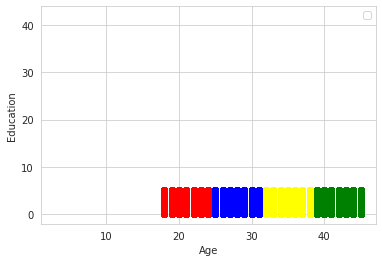

In [115]:
df_a = df_final[df_final.Cluster==0]
df_b = df_final[df_final.Cluster==1]
df_c = df_final[df_final.Cluster==2]
df_d = df_final[df_final.Cluster==3]
plt.scatter(df_a.Age, df_a['Education'], color='green')
plt.scatter(df_b.Age, df_b['Education'], color='blue')
plt.scatter(df_c.Age, df_c['Education'], color='red')
plt.scatter(df_d.Age, df_d['Education'], color='yellow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='white', marker='*')
plt.xlabel('Age')
plt.ylabel('Education')
plt.legend()

# Performing dimensionality reduction and trying to visualize clusters.

In [116]:
from sklearn.decomposition import PCA

pca = PCA(2)

reduced_df = pca.fit_transform(df_final)
reduced_df.shape

(5781, 2)

## Performing clustering in the reduced df.

In [119]:
km_reduced = KMeans(n_clusters=10)

label = km_reduced.fit_predict(reduced_df)
print(label[:30])

[6 8 5 0 8 8 2 2 2 2 2 3 3 3 3 3 0 0 1 7 9 9 7 7 7 7 7 5 1 1]


### Plotting the reduced cluster graph

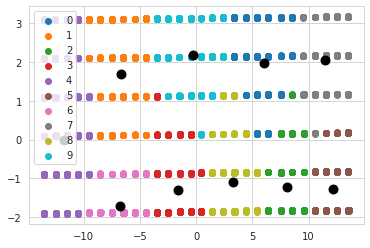

<Figure size 8000x8000 with 0 Axes>

In [123]:
#Getting unique labels
centroids = km_reduced.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(reduced_df[label == i , 0] , reduced_df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.figure(figsize=(100, 100), dpi=80)
plt.show()

# Finding the best no. of clusters using the elbow method.

In [126]:
distortions = []
K = range(1, 15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(reduced_df)
    distortions.append(kmeanModel.inertia_)

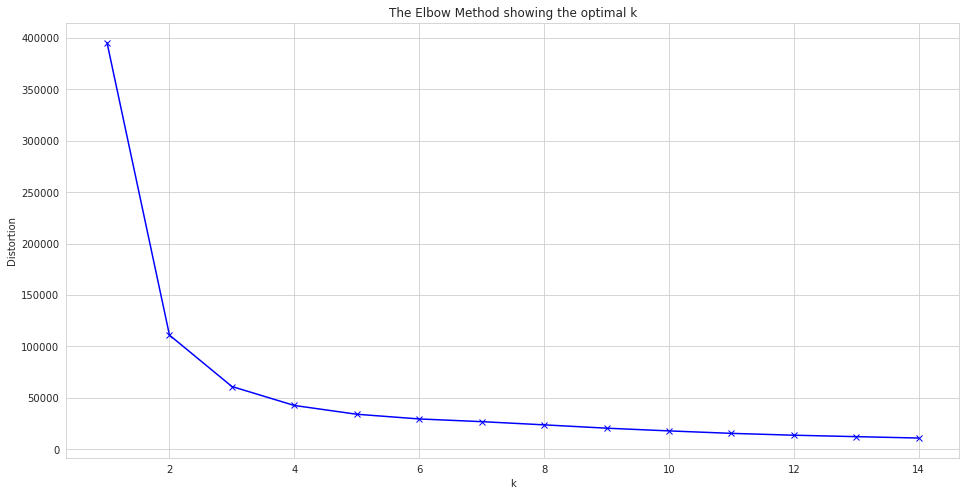

In [127]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()